In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [2]:
netflix_data = pd.read_csv('netflix1.csv')

In [3]:
netflix_data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [5]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [6]:
netflix_data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Distribution of Show Types (Movies vs. TV Shows)

In [7]:
netflix_data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

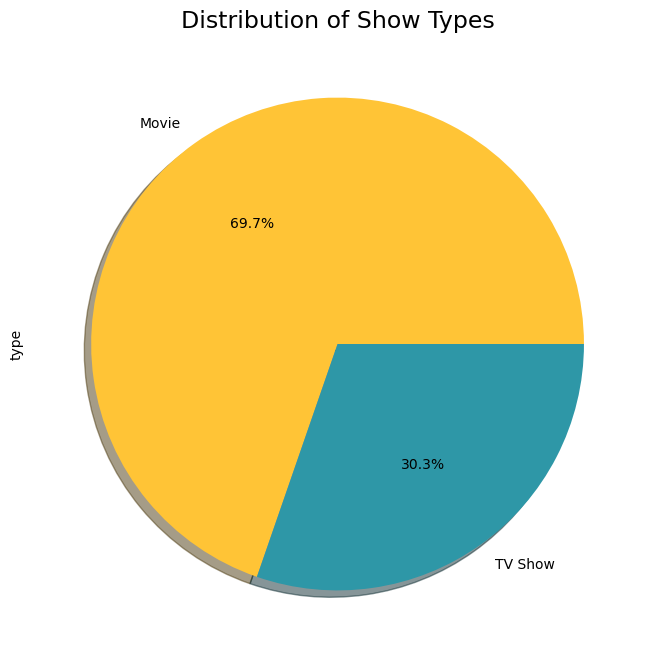

In [8]:
plt.figure(figsize=(8, 8))
netflix_data['type'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FFC436', '#2E97A7'],shadow=1)
plt.title('Distribution of Show Types',size=17)
plt.show()

#  Distribution of Release Years

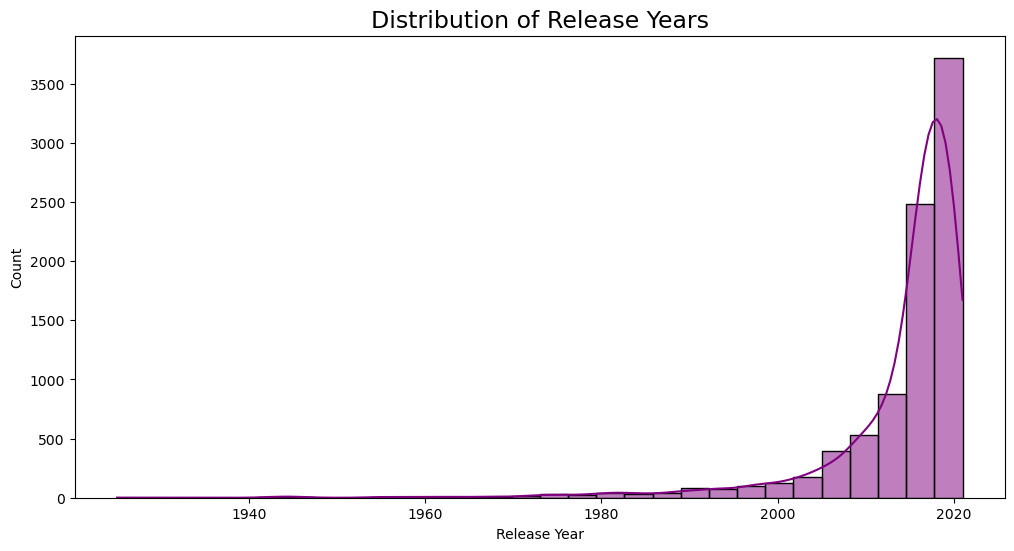

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribution of Release Years',size=17)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Top 10 Countries with the Most Shows

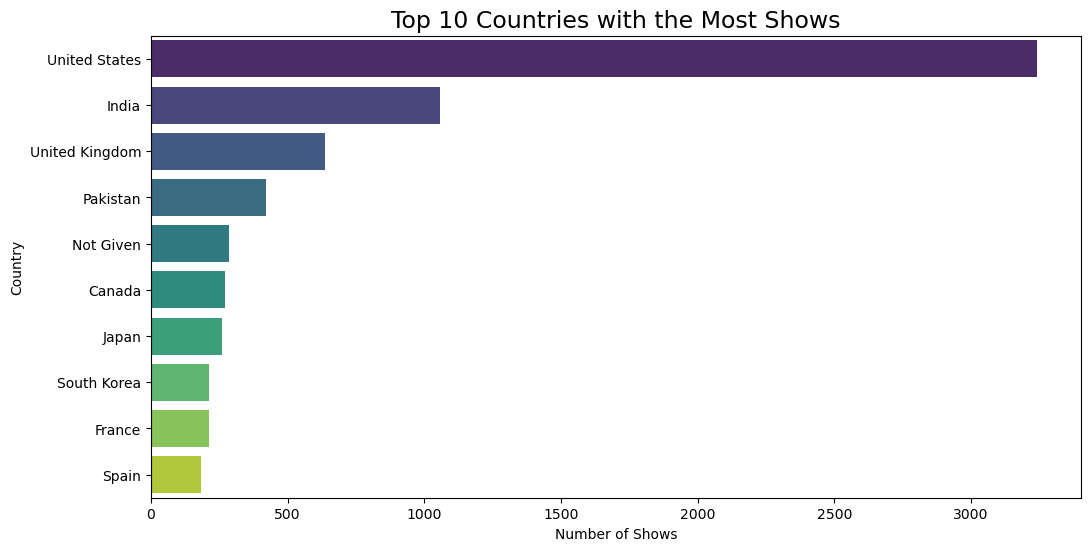

In [10]:
top_countries = netflix_data['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with the Most Shows',size=17)
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.show()

#  Distribution of Ratings

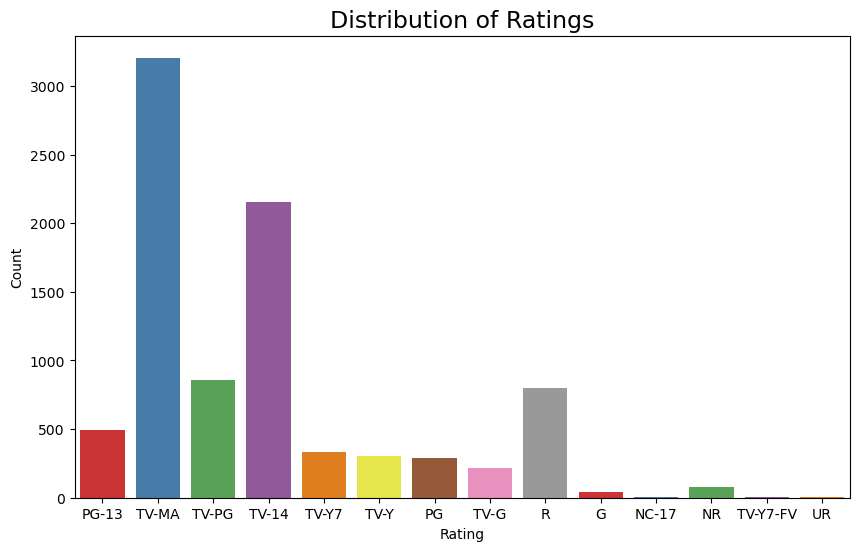

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=netflix_data, palette='Set1')
plt.title('Distribution of Ratings',size=17)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

#  Duration Distribution

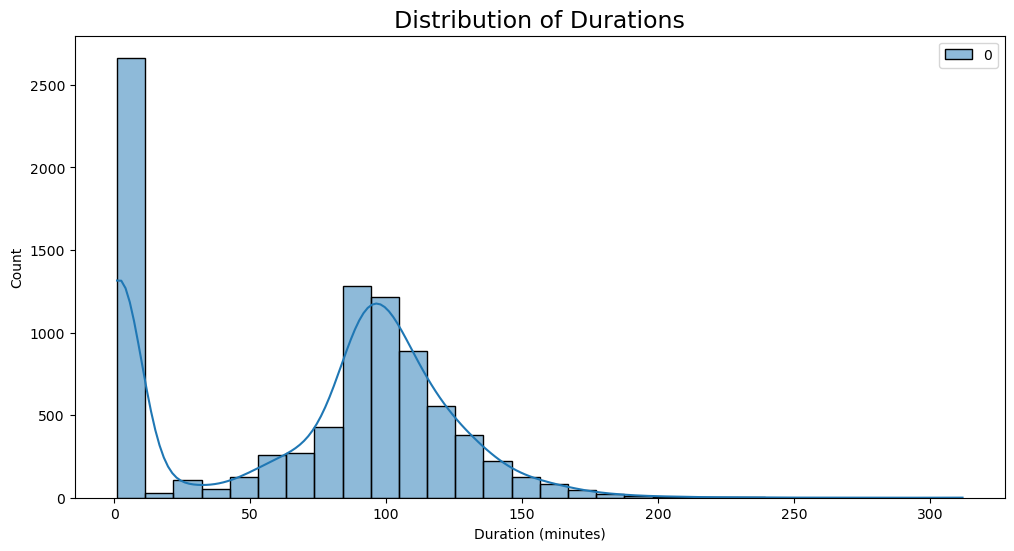

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['duration'].str.extract('(\d+)').astype(float), bins=30, kde=True, color='orange')
plt.title('Distribution of Durations',size=17)
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

# Top Genres

In [13]:
genres = netflix_data['listed_in'].str.split(', ', expand=True).stack()

genre_counts = genres.value_counts()

top_genres = genre_counts.head(10)

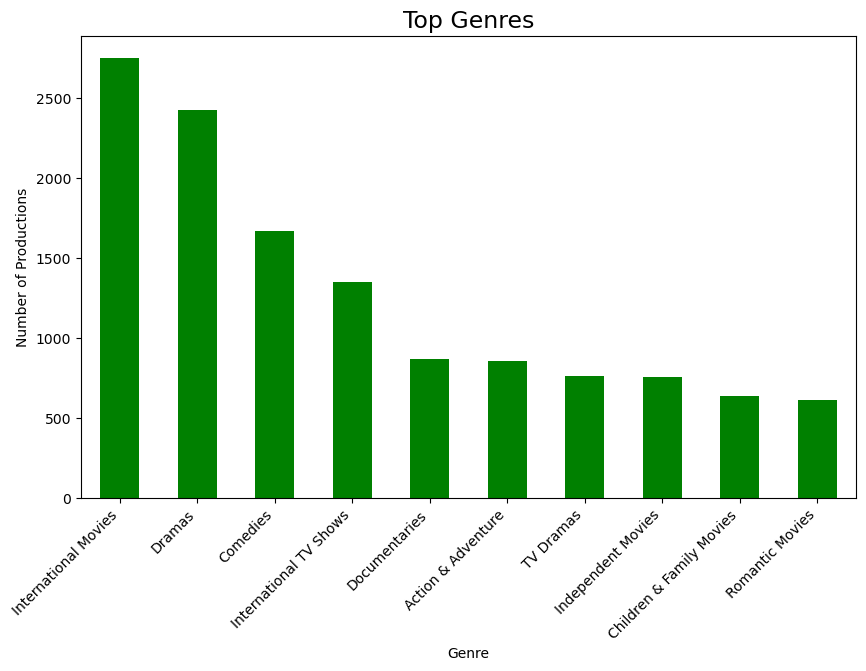

In [14]:
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='green')
plt.title('Top Genres',size=17)
plt.xlabel('Genre')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45, ha='right')
plt.show()

# Number of Shows Added Each Month

In [15]:
from datetime import datetime
import calendar

In [16]:
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])

In [17]:
netflix_data['added_month'] = netflix_data['date_added'].dt.month

In [18]:
monthly_counts = netflix_data['added_month'].value_counts().sort_index()

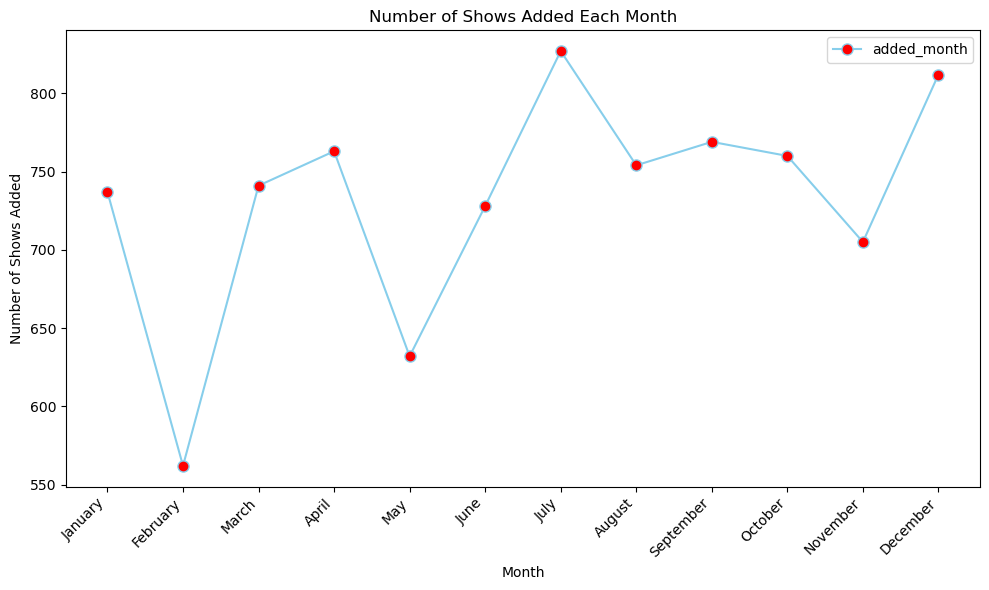

In [19]:
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', marker='o',color='skyblue', markersize= 8,markerfacecolor='red')
plt.title('Number of Shows Added Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Shows Added')
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()